In [1]:
import matplotlib.pyplot as mpl
import pymc as pm
import arviz as az
import os
import sys
import numpy as np
from bokeh.io import export_png
from bokeh.layouts import gridplot
import arviz.labels as azl

# Acceleration experiment

In [71]:
# The chain file
filename = "20220612_024952"
idata = az.from_netcdf('./results/' + filename + ".nc")
save = True

### Posterior plot

In [32]:
labeller = azl.MapLabeller(var_name_map={"Cxf": r"$C_{xf}$","Cxr": r"$C_{xr}$"})
nlabeller = azl.MapLabeller(var_name_map={'sigmaLOV': r"$\sigma_{u}$","sigmaLFW": r"$\sigma_{\omega_f}$",
                                          "sigmaLRW": r"$\sigma_{\omega_r}$"})

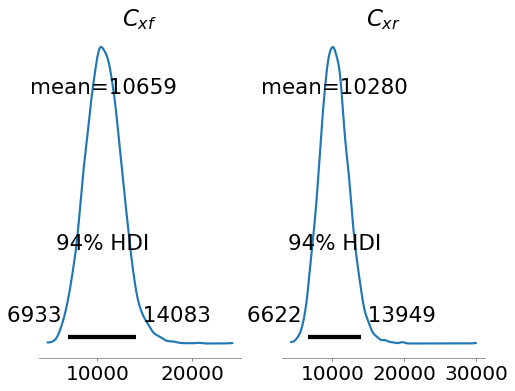

In [39]:
ax_post = az.plot_posterior(idata,figsize = (8,6),var_names = ['Cxf','Cxr'],labeller=labeller,textsize = 20)
fig = ax_post.ravel()[0].figure

path = 'images/'
if(os.path.isdir(path)):
    if(save):
        fig.savefig("./images/acc_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
else:
    os.mkdir(path)
    if(save):
        fig.savefig("./images/acc_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")

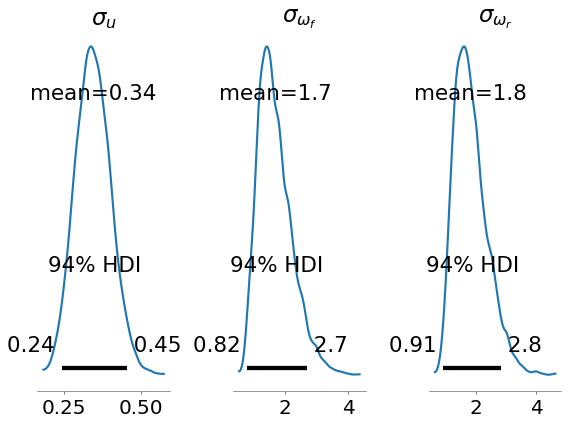

In [46]:
ax_post = az.plot_posterior(idata,figsize = (8,6),var_names = ['sigmaLOV','sigmaLFW','sigmaLRW'],labeller=nlabeller,
                           textsize = 20)
fig = ax_post.ravel()[0].figure
fig.tight_layout()
if(save):
    fig.savefig("./images/acc_post_noise.png",facecolor = 'w',bbox_inches='tight')

### Trace plot

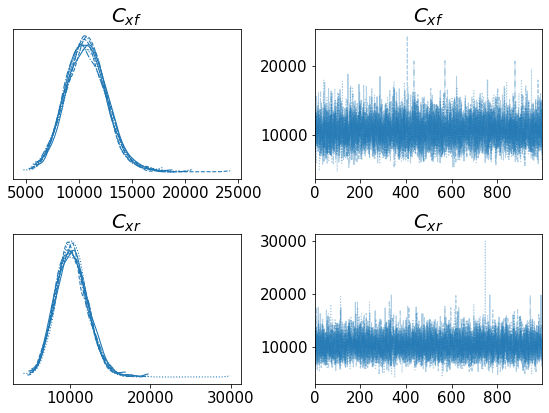

In [96]:

ax_trace = az.plot_trace(idata,figsize = (8,6),var_names = ['Cxf','Cxr'],labeller=labeller)
fig = ax_trace.ravel()[0].figure
fig.tight_layout()
for ax in ax_trace:
    ax[0].title.set_size(20)
    ax[1].title.set_size(20)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
if(save):
    fig.savefig("./images/acc_trace_1.png",facecolor = 'w',bbox_inches='tight')

### Pairwise plot

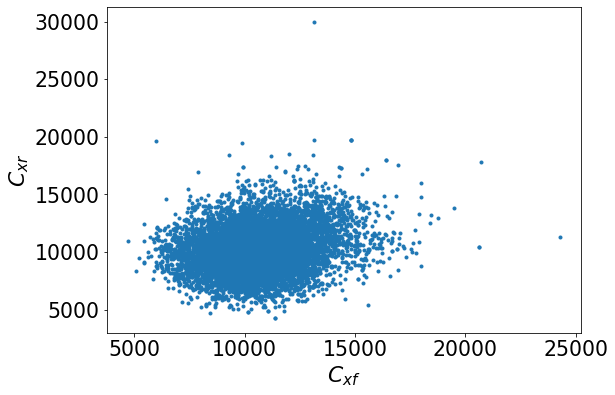

In [168]:
ax_pair = az.plot_pair(idata,figsize = (8.5,6),var_names=['Cxf','Cxr'],labeller=labeller)
# fig = ax_pair.ravel()[0].figure
if(save):
    fig.savefig("./images/acc_pair_1.png",facecolor = 'w')

### Autocorrelation plot

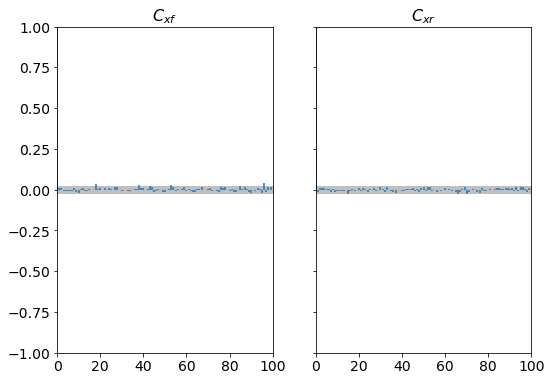

In [169]:
ax_autocorr = az.plot_autocorr(idata,combined = True,figsize = (8.5,6),var_names = ['Cxf','Cxr'],labeller=labeller)
fig = ax_autocorr.ravel()[0].figure
if(save):
    fig.savefig("./images/acc_cor_1.png",facecolor = 'w')

### Effective Sample SIze

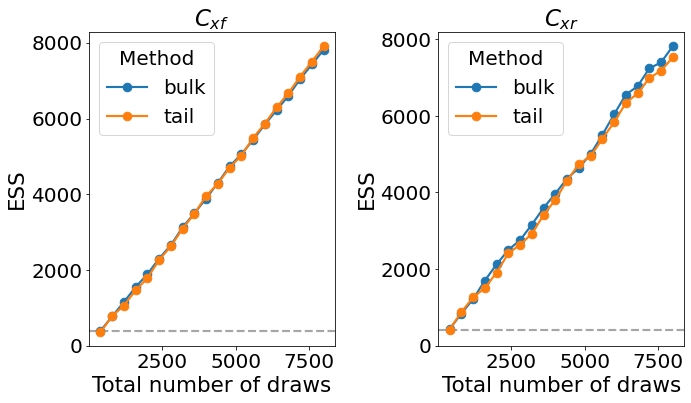

In [67]:
ax_ess = az.plot_ess(idata,kind = "evolution",figsize = (10,6),var_names = ['Cxf','Cxr'],labeller=labeller,
                     textsize=20)
fig = ax_ess.ravel()[0].figure
fig.tight_layout()
if(save):
    fig.savefig("./images/acc_esse_1.png",facecolor = 'w',bbox_inches='tight')

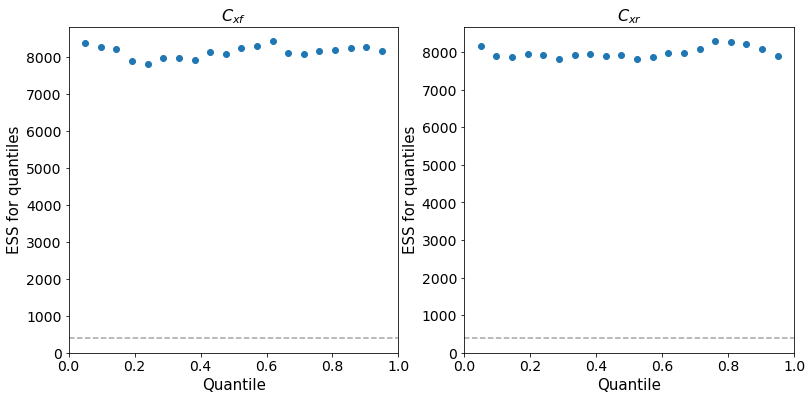

In [118]:
ax_ess = az.plot_ess(idata,kind = "quantile",figsize = (13,6),var_names = ['Cxf','Cxr'],labeller=labeller)
fig = ax_ess.ravel()[0].figure
if(save):
    fig.savefig("./images/acc_essq_1.png",facecolor = 'w')

### Statisctics

In [161]:
sum_stats = az.summary(idata,kind='diagnostics',round_to = 4)

In [162]:
sum_stats

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Cxf,21.7974,15.4271,7814.9798,7907.2371,1.0003
Cxr,22.6870,16.0428,7817.6034,7522.9436,1.0002
sigmaLOV,0.0006,0.0004,8000.8903,7751.3141,1.0001
sigmaLFW,0.0059,0.0042,8055.9848,7821.5919,1.0000
sigmaLRW,0.0060,0.0043,8263.3968,7988.2980,1.0002


In [6]:
labeller = azl.MapLabeller(var_name_map={"Cxf": r"\[\sin(x)\]","Cxr": r"\[\cos(x)\]"})
ax_post = az.plot_posterior(idata,figsize = (8,6),backend = "Bokeh",var_names = ['Cxf','Cxr'],labeller=labeller)
# export_png(gridplot(ax_post.tolist()), filename="./images/bug4.png")

# Rolling resistance experiment

In [97]:
# The chain file
filename = "20220612_025748"
idata = az.from_netcdf('./results/' + filename + ".nc")
save = True

In [98]:
nlabeller = azl.MapLabeller(var_name_map={'sigmaLOV': r"$\sigma_{u}$"})

### Posterior

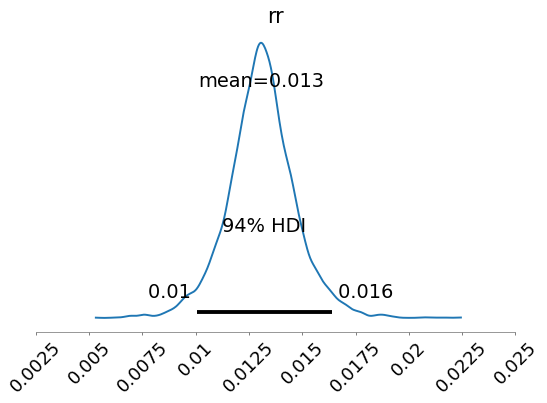

In [135]:
ax_post = az.plot_posterior(idata,figsize = (8,6),var_names = ['rr'],labeller = nlabeller,textsize=18)
# print(type(ax_post))
ax_post.set_xticks(np.round(ax_post.get_xticks(),4),np.round(ax_post.get_xticks(),4), rotation=45)
fig = ax_post.figure
fig.tight_layout()
path = 'images/'
if(os.path.isdir(path)):
    if(save):
        fig.savefig("./images/rr_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
else:
    os.mkdir(path)
    if(save):
        fig.savefig("./images/rr_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")

In [123]:
ax_post.get_xticks()

array([0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175, 0.02  ,
       0.0225, 0.025 ])

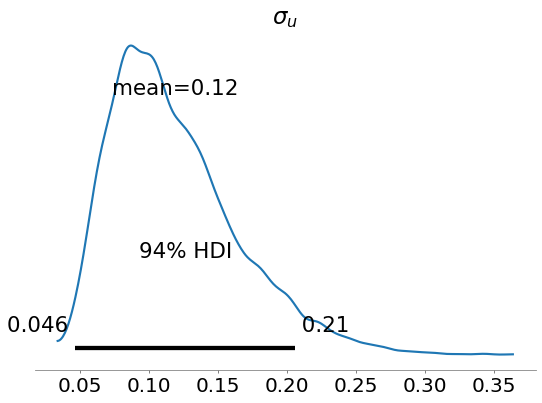

In [102]:
ax_post = az.plot_posterior(idata,figsize = (8,6),var_names = ['sigmaLOV'],labeller = nlabeller,textsize=20)

fig = ax_post.figure
fig.tight_layout()
path = 'images/'
if(os.path.isdir(path)):
    if(save):
        fig.savefig("./images/rr_post_noise.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
else:
    os.mkdir(path)
    if(save):
        fig.savefig("./images/rr_post_noise.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")

### Trace

/tmp/ipykernel_144021/449082318.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inces" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig("./images/rr_trace_1.png",facecolor = 'w',bbox_inces='tight')


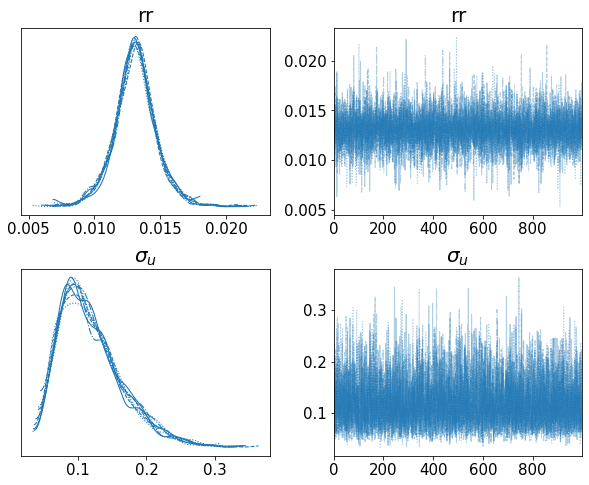

In [101]:
ax_trace = az.plot_trace(idata,figsize = (8.5,7),labeller=nlabeller)
fig = ax_trace.ravel()[0].figure
fig.tight_layout()
for ax in ax_trace:
    ax[0].title.set_size(20)
    ax[1].title.set_size(20)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
if(save):
    fig.savefig("./images/rr_trace_1.png",facecolor = 'w',bbox_inces='tight')

### Pairwise plot

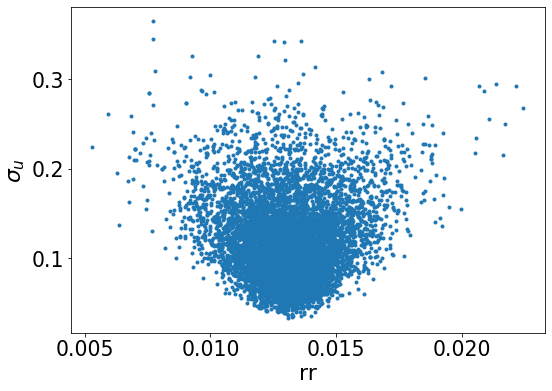

In [176]:
ax_pair = az.plot_pair(idata,figsize = (8.5,6),labeller=nlabeller)
# fig = ax_pair.ravel()[0].figure
if(save):
    fig.savefig("./images/rr_pair_1.png",facecolor = 'w')

### ESS

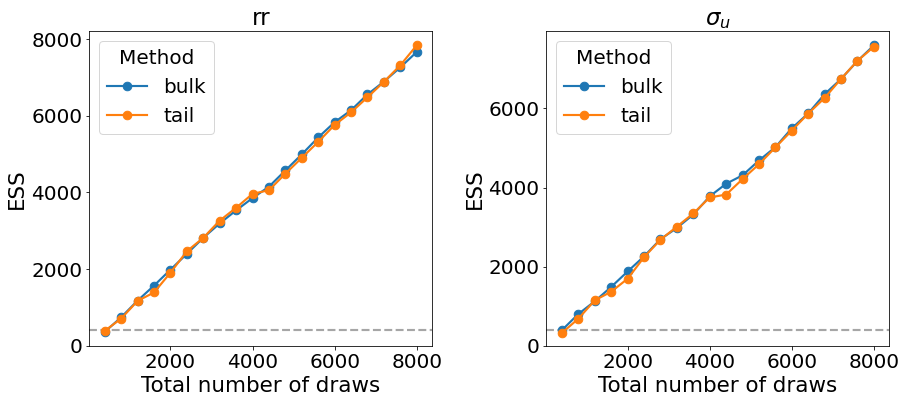

In [136]:
ax_ess = az.plot_ess(idata,kind = "evolution",figsize = (13,6),labeller=nlabeller,textsize=20)
fig = ax_ess.ravel()[0].figure
fig.tight_layout()
if(save):
    fig.savefig("./images/rr_esse_1.png",facecolor = 'w',bbox_inches='tight')

### Stats


In [178]:
sum_stats = az.summary(idata,kind='diagnostics',round_to = 6)
sum_stats

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
rr,0.000019,0.000013,7661.911295,7835.652472,1.000109
sigmaLOV,0.000543,0.000389,7591.644838,7556.664672,0.999911


# Steering experiment

In [202]:
# The chain file
# filename = "20220608_031039"

# filename = "20220612_154116"
# filename = "20220613_114819"
filename = "20220610_113543"
# filename = "20220612_164053"
# filename = "20220611_230716"
idata = az.from_netcdf('./results/' + filename + ".nc")
save = False

### Posterior plot

In [203]:
labeller = azl.MapLabeller(var_name_map={"Cf": r"$C_{f}$","Cr": r"$C_{r}$","krof":r"$k_{\phi_f}$"
                                        ,"kror":r"$k_{\phi_r}$","brof":r"$b_{\phi_f}$","bror":r"$b_{\phi_r}$"})
nlabeller = azl.MapLabeller(var_name_map={'sigmaLV': r"$\sigma_{v}$","sigmaRA": r"$\sigma_{\phi}$",
                                          "sigmaRR":r"$\sigma_{\dot{\phi}}$","sigmaYR" : r"$\sigma_{\dot{\psi}}$"})

[<matplotlib.axis.XTick object at 0x7f9007f05490>, <matplotlib.axis.XTick object at 0x7f9007f05460>]


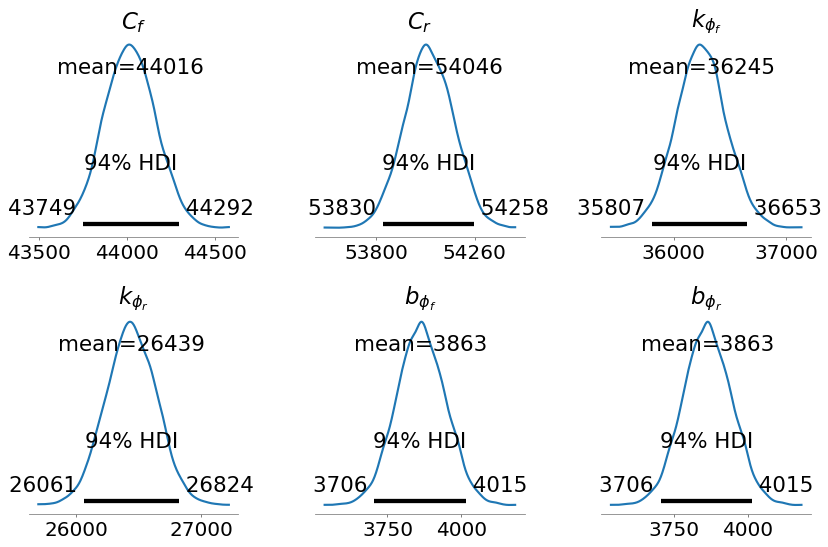

In [201]:
ax_post = az.plot_posterior(idata,figsize = (12,8),var_names = ['Cf','Cr','krof','kror','brof','bror'],
                            labeller=labeller,textsize=20)
# ax_post = az.plot_posterior(idata,figsize = (6,6),var_names = ['brof','bror'],
#                             labeller=labeller,textsize=20)
print(ax_post[0,1].set_xticks([53800,54260]))
fig = ax_post.ravel()[0].figure
fig.tight_layout()
path = 'images/'
if(os.path.isdir(path)):
    if(save):
        fig.savefig("./images/st_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
else:
    os.mkdir(path)
    if(save):
        fig.savefig("./images/st_post_1.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
# fig.savefig("./images/post_b.png",facecolor = 'w',bbox_inches='tight')
# fig.savefig("./images/comp_nuts.png",facecolor = 'w',bbox_inches='tight')

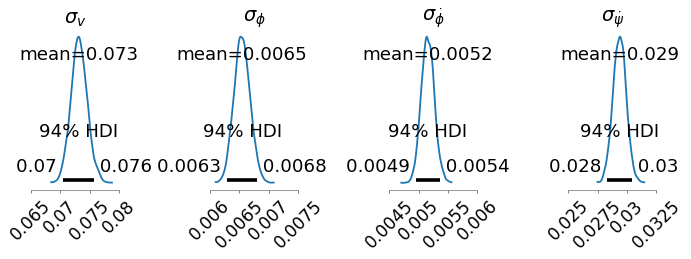

In [173]:
ax_post = az.plot_posterior(idata,figsize = (10,4),var_names = ["sigmaLV","sigmaRA","sigmaRR","sigmaYR"],
                            labeller=nlabeller,textsize=17)

for ax in ax_post:
    ax.set_xticks(np.round(ax.get_xticks(),4),np.round(ax.get_xticks(),4), rotation=45)
fig = ax_post.ravel()[0].figure
fig.tight_layout()
path = 'images/'
if(os.path.isdir(path)):
    if(save):
        fig.savefig("./images/st_post_noise.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
else:
    os.mkdir(path)
    if(save):
        fig.savefig("./images/st_post_noise.png",facecolor = 'w',bbox_inches='tight')
#         export_png(gridplot(ax_post.tolist()), filename=path + filename + "_post.png")
fig.savefig("./images/comp_nuts_noise.png",facecolor = 'w',bbox_inches='tight')

### Trace

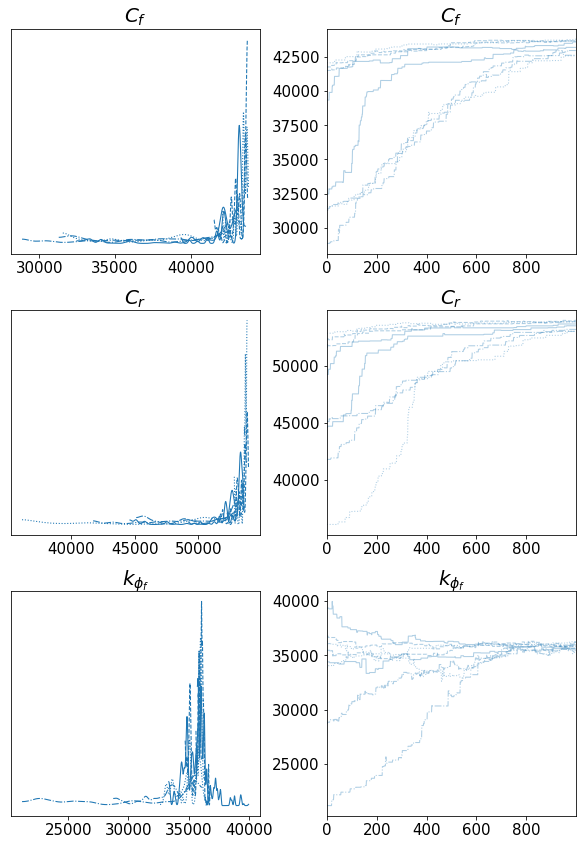

In [163]:
ax_trace = az.plot_trace(idata,figsize = (8.5,12),var_names = ['Cf','Cr','krof']
                         ,labeller=labeller)
fig = ax_trace.ravel()[0].figure
fig.tight_layout()
for ax in ax_trace:
    ax[0].title.set_size(20)
    ax[1].title.set_size(20)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)
if(save):
    fig.savefig("./images/st_trace_1.png",facecolor = 'w',bbox_inches='tight')
fig.savefig("./images/comp_bad_met.png")

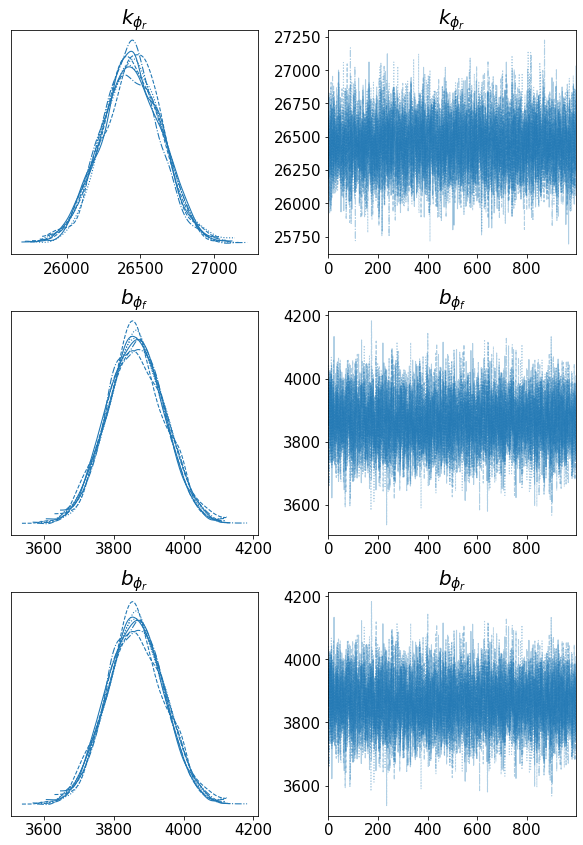

In [158]:

ax_trace = az.plot_trace(idata,figsize = (8.5,12),var_names = ['kror','brof','bror']
                         ,labeller=labeller)
fig = ax_trace.ravel()[0].figure
fig.tight_layout()
for ax in ax_trace:
    ax[0].title.set_size(20)
    ax[1].title.set_size(20)
    ax[0].tick_params(axis='both', which='major', labelsize=15)
    ax[1].tick_params(axis='both', which='major', labelsize=15)

if(save):
    fig.savefig("./images/st_trace_2.png",facecolor = 'w',bbox_inches='tight')

### Pairwise correlation

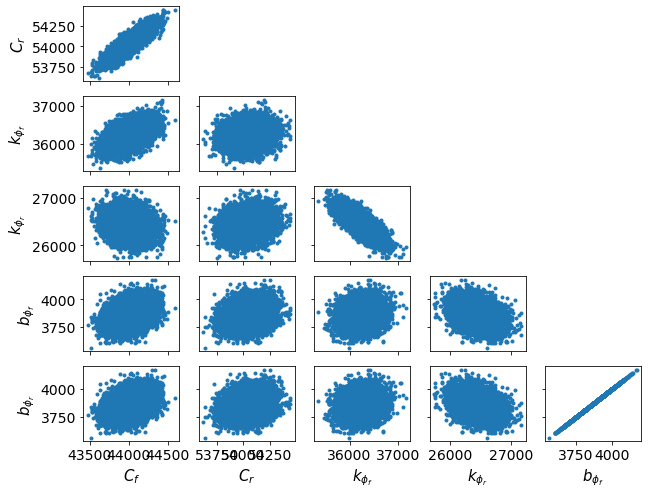

In [207]:
ax_pair = az.plot_pair(idata,figsize = (10,8),var_names=['Cf','Cr','krof','kror','brof','bror']
                       ,labeller=labeller)
fig = ax_pair.ravel()[0].figure
if(save):
    fig.savefig("./images/st_pair_1.png",facecolor = 'w')

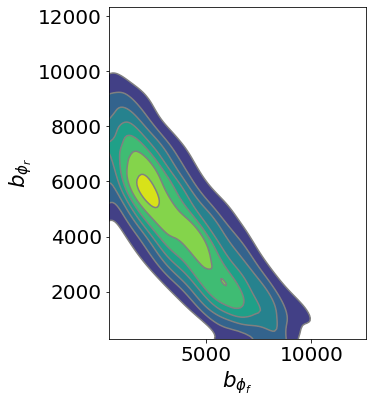

In [206]:
ax_pair = az.plot_pair(idata,figsize = (6,6),var_names=['brof','bror']
                       ,labeller=labeller,textsize=20,kind='kde')
fig = ax_pair.figure
fig.tight_layout()
if(save):
    fig.savefig("./images/st_pair_1.png",facecolor = 'w')
fig.savefig("./images/pair_b.png",facecolor = 'w',bbox_inches="tight")

### ESS

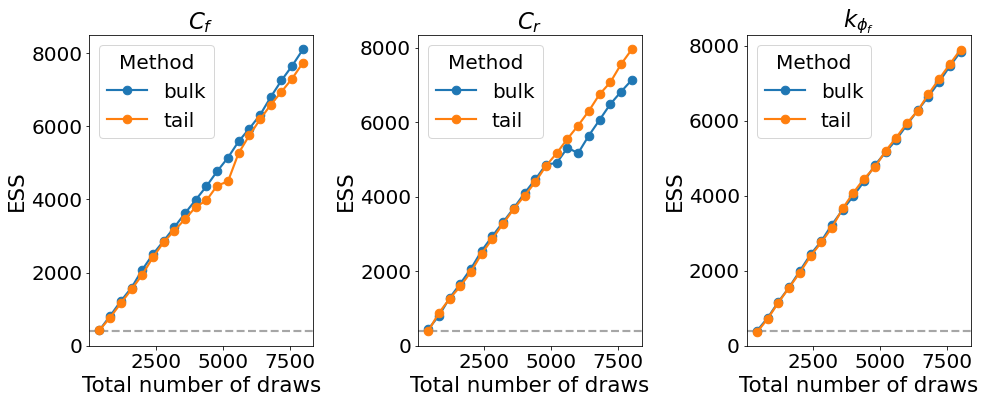

In [159]:
ax_ess = az.plot_ess(idata,kind = "evolution",figsize = (14,6),var_names=['Cf','Cr','krof'],
                     labeller=labeller,textsize=20)
fig = ax_ess.ravel()[0].figure
fig.tight_layout()
if(save):
    fig.savefig("./images/st_esse_1.png",facecolor = 'w',bbox_inches='tight')
# fig.savefig("./images/comp_met_ess_1.png",facecolor = 'w')

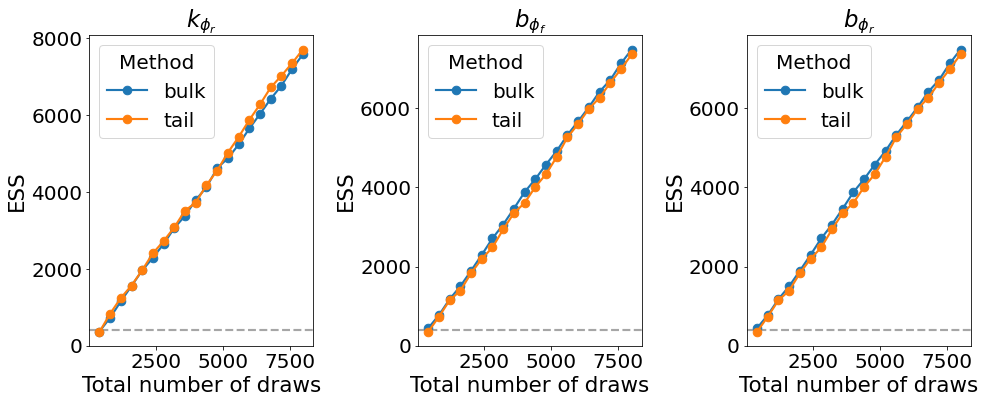

In [160]:
ax_ess = az.plot_ess(idata,kind = "evolution",figsize = (14,6),var_names=['kror','brof','bror'],
                     labeller=labeller,textsize=20)
fig = ax_ess.ravel()[0].figure
fig.tight_layout()
if(save):
    fig.savefig("./images/st_esse_2.png",facecolor = 'w',bbox_inches='tight')
# fig.savefig("./images/comp_met_ess_2.png",facecolor = 'w')

### Stats


In [251]:
sum_stats = az.summary(idata,kind='diagnostics',round_to = 6)
np.mean(sum_stats['r_hat'])

1.001156733333333

In [259]:
print(f"Mean r_hat for all paramters is {sum_stats.loc[:,'r_hat'].mean()}")
print(f"Sampling time in hours {round(idata.sample_stats.sampling_time/60,2)}")
# print(f"The number of draws are {idata.posterior.draw.shape[0]}")
print(f"The Bulk relative effective sample size is {np.mean(az.ess(idata,var_names=['Cf','Cr','krof','kror','brof','bror','sigmaLV','sigmaRA','sigmaRR','sigmaYR']).to_array())}")
print(f"The Bulk Effective samples per second is {az.ess(idata,var_names=['Cf','Cr','krof','kror','brof','bror','sigmaLV','sigmaRA','sigmaRR','sigmaYR'])/idata.sample_stats.sampling_time}")

Mean r_hat for all paramters is 1.001156733333333
Sampling time in hours 567.97
The Bulk relative effective sample size is <xarray.DataArray ()>
array(6924.36800595)
The Bulk Effective samples per second is <xarray.Dataset>
Dimensions:  ()
Data variables:
    Cf       float64 0.1237
    Cr       float64 0.1366
    krof     float64 0.136
    kror     float64 0.1514
    brof     float64 0.2112
    bror     float64 0.2112
    sigmaLV  float64 0.2779
    sigmaRA  float64 0.2504
    sigmaRR  float64 0.259
    sigmaYR  float64 0.2745


In [143]:
filename = "20220610_113844"
idata = az.from_netcdf('./results/' + filename + ".nc")


In [145]:
idata.sample_stats.sampling_time

65519.64614892006

In [260]:
np.mean(az.ess(idata,var_names=['Cf','Cr','krof','kror','brof','bror','sigmaLV','sigmaRA','sigmaRR','sigmaYR']).to_array())/(567*60)

<xarray.DataArray ()>
array(0.20353815)

Inference data with groups:
	> posterior
	> sample_stats